### This file performs regular expressions to parse the tweets.

In [4]:
import pandas as pd
import re
import emoji
import matplotlib.pyplot as plt
import numpy as np
import itertools
from itertools import groupby, islice
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import tensorflow
from transformers import pipeline

In [92]:
covid = pd.read_csv('covid19_tweets_final.csv',encoding='utf-8')

In [80]:
covid.shape

(91448, 26)

In [93]:
covid.head(50)

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,weekday,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,topic_list
0,0,Taya Ã¢ÂÂ¤,NaN,I don't follow back,2011-10-01 05:55:50,283,0,8324,False,2020-01-27 00:24:01,...,0,0,112,NEGATIVE,0.997167,0.000000,0.000000,-0.7430,0,"['death january feels like', 'year grabe janua..."
1,1,Eric Ng,Hong Kong,"Hong Kong-based senior business reporter, Sout...",2015-02-23 12:28:27,1000,191,1,True,2020-01-27 00:37:26,...,0,0,102,NEGATIVE,0.999039,0.000000,0.000000,-0.0516,1,"['casinos hurt s', 'wuhan virus shot', 'health..."
2,2,Greg Folkers,"Washington, D.C., U.S.A.","Washington, DC",2009-05-21 17:03:17,4188,178,875,False,2020-01-27 00:50:36,...,0,0,137,NEGATIVE,0.980284,0.000000,0.000000,0.5267,2,"['s', 'aovlpgufvm s', 'transmission dynamics',..."
3,3,Deplorable Chump Texanon,"Texas, USA","God, Family, Country. God Wins! I love my won...",2009-03-26 20:31:39,675,987,3491,False,2020-01-27 00:58:18,...,0,0,212,NEGATIVE,0.971413,0.000000,0.450000,-0.7430,3,"['lancet publishes early study', 's', 'coronav..."
4,4,Luke WalthamÃ¢ÂÂ·,contactlukewaltham@gmail.com,22. Bisexual. Queer. He/They. Intersectional F...,2012-09-09 00:19:29,220029,9268,233087,True,2020-01-27 00:58:25,...,0,0,275,NEGATIVE,0.993612,0.000000,0.180000,-0.9524,4,"['Ã¢ fear getting', 'racist towards asian peop..."
5,5,CP24,Toronto,Official account of CP24 - Toronto and the GTA...,2009-01-28 04:56:13,1952779,371,1,True,2020-01-27 01:00:00,...,0,1,105,NEGATIVE,0.989554,0.000000,0.000000,0.0000,5,"['outbreak s', 's']"
6,6,Amber Ã©Â¦ÂÃ¦Â¸Â¯ Ã°ÂÂÂ·Ã¢ÂÂÃ¢ÂÂÃ¯Â¸ÂÃ...,Hong Kong,Ã¥Â®Â¶Ã¥ÂºÂ­Ã§Â Â®Ã¥Â©Â¦Ã¯Â¼ÂÃ©Â¦ÂÃ¦Â¸Â¯Ã¥Âª...,2019-09-04 20:28:23,2907,4914,59928,False,2020-01-27 01:15:57,...,0,1,304,NEGATIVE,0.996265,0.122500,0.565000,0.6597,6,"['want better leader', 'good living standard',..."
7,7,Steven Lee Myers,NaN,The New York Times in Beijing. Formerly in Mos...,2009-04-21 14:14:37,15781,1366,2691,False,2020-01-27 01:21:52,...,0,1,159,NEGATIVE,0.954377,0.133333,0.800000,-0.5242,7,"['Ã¢ s', 'Ã¢ itÃ¢']"
8,8,Solomon Yue,"Salem, Oregon, USA","Vice Chairman & CEO at Republicans Overseas, R...",2013-04-09 15:38:48,194950,424,61427,False,2020-01-27 01:31:59,...,0,1,247,NEGATIVE,0.997793,-0.108333,0.175000,-0.9523,8,"['kill foreign enemies', 'becomes emperor shit..."
9,9,Peter Billerbeck,NaN,Current @HouseForeign | Fmr @TeamMoulton Sr Ad...,2010-08-09 22:32:27,1195,2165,4772,False,2020-01-27 01:42:56,...,0,1,278,NEGATIVE,0.998627,0.077679,0.553571,0.0000,9,"['single senior us official', 'senior admin of..."


In [85]:
covid_sentiment = pd.read_csv('covid19_tweets_sentiment.csv')
covid_sentiment.shape

(179113, 15)

In [87]:
covid_sentiment.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,sentiment_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,NEGATIVE,0.993067
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,NEGATIVE,0.987818
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,NEGATIVE,0.992243
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,POSITIVE,0.998897
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,NEGATIVE,0.992979
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071.0,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,NEGATIVE,0.997776
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810.0,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,NEGATIVE,0.983864
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355.0,95.0,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,NEGATIVE,0.965411
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29.0,18.0,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,NEGATIVE,0.964648
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239.0,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,NEGATIVE,0.979755


In [25]:
# Helper function
def get_sentiment(text):
    res = classifier(text)[0]
    return res['label'], res['score']

tweets = covid['full_text'].values
tweets = [x for x in tweets if str(x) != 'nan']
# Use hugging face for sentiment scoring
# nlptown/bert-base-multilingual-uncased-sentiment
classifier = pipeline('sentiment-analysis')
sentiment = []
sentiment_score = []

for idx in tqdm(range(24357)):
    tweet = tweets[idx]
    label, score = get_sentiment(tweet)
    sentiment.append(label)
    sentiment_score.append(score)

covid['sentiment'] = sentiment
covid['sentiment_score'] = sentiment_score
covid.to_csv('data/covid19_tweets_sentiment_new.csv', index=None)




  0%|          | 0/24357 [00:00<?, ?it/s]

  0%|          | 4/24357 [00:00<11:45, 34.51it/s]

  0%|          | 7/24357 [00:00<15:25, 26.32it/s]

  0%|          | 9/24357 [00:00<17:41, 22.94it/s]

  0%|          | 11/24357 [00:00<20:20, 19.95it/s]

  0%|          | 13/24357 [00:00<20:45, 19.55it/s]

  0%|          | 15/24357 [00:00<25:52, 15.68it/s]

  0%|          | 17/24357 [00:00<24:28, 16.57it/s]

  0%|          | 20/24357 [00:01<24:47, 16.36it/s]

  0%|          | 22/24357 [00:01<26:01, 15.58it/s]

  0%|          | 24/24357 [00:01<24:59, 16.23it/s]

  0%|          | 26/24357 [00:01<23:39, 17.14it/s]

  0%|          | 28/24357 [00:01<25:44, 15.75it/s]

  0%|          | 30/24357 [00:01<26:08, 15.51it/s]

  0%|          | 33/24357 [00:01<24:41, 16.42it/s]

  0%|          | 35/24357 [00:02<23:58, 16.91it/s]

  0%|          | 37/24357 [00:02<24:07, 16.80it/s]

  0%|          | 40/24357 [00:02<22:09, 18.29it/s]

  0%|          | 43/24357 [00:02<19:45, 20.52it/s]

  0%|          | 46/24

  3%|▎         | 813/24357 [00:38<17:47, 22.06it/s]

  3%|▎         | 816/24357 [00:38<19:15, 20.38it/s]

  3%|▎         | 819/24357 [00:38<19:38, 19.97it/s]

  3%|▎         | 822/24357 [00:38<20:58, 18.70it/s]

  3%|▎         | 824/24357 [00:38<21:53, 17.91it/s]

  3%|▎         | 826/24357 [00:39<22:40, 17.29it/s]

  3%|▎         | 828/24357 [00:39<23:45, 16.51it/s]

  3%|▎         | 831/24357 [00:39<22:01, 17.80it/s]

  3%|▎         | 834/24357 [00:39<20:24, 19.22it/s]

  3%|▎         | 837/24357 [00:39<19:30, 20.09it/s]

  3%|▎         | 840/24357 [00:39<19:21, 20.25it/s]

  3%|▎         | 843/24357 [00:39<18:29, 21.20it/s]

  3%|▎         | 846/24357 [00:39<17:23, 22.53it/s]

  3%|▎         | 850/24357 [00:40<15:34, 25.16it/s]

  4%|▎         | 853/24357 [00:40<17:25, 22.49it/s]

  4%|▎         | 857/24357 [00:40<16:41, 23.46it/s]

  4%|▎         | 860/24357 [00:40<17:31, 22.36it/s]

  4%|▎         | 863/24357 [00:40<17:14, 22.71it/s]

  4%|▎         | 866/24357 [00:40<17:22, 22.53

  7%|▋         | 1615/24357 [01:15<17:28, 21.68it/s]

  7%|▋         | 1618/24357 [01:16<16:46, 22.59it/s]

  7%|▋         | 1621/24357 [01:16<18:19, 20.68it/s]

  7%|▋         | 1624/24357 [01:16<19:08, 19.79it/s]

  7%|▋         | 1627/24357 [01:16<17:56, 21.11it/s]

  7%|▋         | 1630/24357 [01:16<18:19, 20.66it/s]

  7%|▋         | 1633/24357 [01:16<18:14, 20.76it/s]

  7%|▋         | 1637/24357 [01:16<16:18, 23.21it/s]

  7%|▋         | 1640/24357 [01:17<17:06, 22.14it/s]

  7%|▋         | 1643/24357 [01:17<18:56, 19.98it/s]

  7%|▋         | 1646/24357 [01:17<18:28, 20.49it/s]

  7%|▋         | 1649/24357 [01:17<20:08, 18.79it/s]

  7%|▋         | 1651/24357 [01:17<20:03, 18.87it/s]

  7%|▋         | 1655/24357 [01:17<17:42, 21.37it/s]

  7%|▋         | 1658/24357 [01:17<16:12, 23.33it/s]

  7%|▋         | 1661/24357 [01:18<15:55, 23.77it/s]

  7%|▋         | 1665/24357 [01:18<15:11, 24.90it/s]

  7%|▋         | 1668/24357 [01:18<14:34, 25.94it/s]

  7%|▋         | 1671/24357 

 10%|▉         | 2399/24357 [01:53<15:53, 23.03it/s]

 10%|▉         | 2402/24357 [01:54<15:14, 24.02it/s]

 10%|▉         | 2405/24357 [01:54<17:35, 20.80it/s]

 10%|▉         | 2409/24357 [01:54<15:59, 22.88it/s]

 10%|▉         | 2412/24357 [01:54<15:57, 22.91it/s]

 10%|▉         | 2415/24357 [01:54<19:12, 19.04it/s]

 10%|▉         | 2418/24357 [01:54<20:50, 17.55it/s]

 10%|▉         | 2420/24357 [01:55<20:46, 17.60it/s]

 10%|▉         | 2422/24357 [01:55<20:22, 17.94it/s]

 10%|▉         | 2424/24357 [01:55<19:51, 18.41it/s]

 10%|▉         | 2426/24357 [01:55<19:54, 18.36it/s]

 10%|▉         | 2429/24357 [01:55<19:21, 18.89it/s]

 10%|▉         | 2432/24357 [01:55<18:35, 19.66it/s]

 10%|▉         | 2435/24357 [01:55<17:43, 20.62it/s]

 10%|█         | 2438/24357 [01:55<17:44, 20.60it/s]

 10%|█         | 2441/24357 [01:56<18:16, 19.99it/s]

 10%|█         | 2444/24357 [01:56<21:32, 16.95it/s]

 10%|█         | 2446/24357 [01:56<21:38, 16.88it/s]

 10%|█         | 2449/24357 

 13%|█▎        | 3160/24357 [02:32<22:37, 15.61it/s]

 13%|█▎        | 3162/24357 [02:32<22:21, 15.80it/s]

 13%|█▎        | 3164/24357 [02:32<21:40, 16.29it/s]

 13%|█▎        | 3166/24357 [02:32<22:31, 15.68it/s]

 13%|█▎        | 3168/24357 [02:32<21:41, 16.28it/s]

 13%|█▎        | 3170/24357 [02:32<20:59, 16.83it/s]

 13%|█▎        | 3172/24357 [02:32<20:55, 16.88it/s]

 13%|█▎        | 3175/24357 [02:33<19:56, 17.70it/s]

 13%|█▎        | 3177/24357 [02:33<20:14, 17.44it/s]

 13%|█▎        | 3180/24357 [02:33<18:34, 19.01it/s]

 13%|█▎        | 3182/24357 [02:33<19:04, 18.50it/s]

 13%|█▎        | 3186/24357 [02:33<16:21, 21.57it/s]

 13%|█▎        | 3189/24357 [02:33<16:06, 21.90it/s]

 13%|█▎        | 3192/24357 [02:33<17:02, 20.70it/s]

 13%|█▎        | 3195/24357 [02:34<18:09, 19.43it/s]

 13%|█▎        | 3198/24357 [02:34<18:27, 19.11it/s]

 13%|█▎        | 3200/24357 [02:34<19:29, 18.10it/s]

 13%|█▎        | 3202/24357 [02:34<18:55, 18.63it/s]

 13%|█▎        | 3205/24357 

 16%|█▌        | 3949/24357 [03:10<18:59, 17.90it/s]

 16%|█▌        | 3951/24357 [03:10<21:32, 15.79it/s]

 16%|█▌        | 3953/24357 [03:10<22:06, 15.38it/s]

 16%|█▌        | 3955/24357 [03:11<23:12, 14.65it/s]

 16%|█▌        | 3957/24357 [03:11<21:23, 15.89it/s]

 16%|█▋        | 3960/24357 [03:11<19:14, 17.67it/s]

 16%|█▋        | 3963/24357 [03:11<17:58, 18.90it/s]

 16%|█▋        | 3966/24357 [03:11<18:39, 18.22it/s]

 16%|█▋        | 3969/24357 [03:11<16:57, 20.04it/s]

 16%|█▋        | 3972/24357 [03:11<16:23, 20.72it/s]

 16%|█▋        | 3975/24357 [03:11<15:57, 21.29it/s]

 16%|█▋        | 3978/24357 [03:12<15:26, 21.99it/s]

 16%|█▋        | 3982/24357 [03:12<14:56, 22.72it/s]

 16%|█▋        | 3985/24357 [03:12<14:45, 23.00it/s]

 16%|█▋        | 3988/24357 [03:12<15:33, 21.82it/s]

 16%|█▋        | 3991/24357 [03:12<15:46, 21.52it/s]

 16%|█▋        | 3994/24357 [03:12<15:50, 21.43it/s]

 16%|█▋        | 3997/24357 [03:12<15:00, 22.61it/s]

 16%|█▋        | 4000/24357 

 20%|█▉        | 4764/24357 [03:49<14:42, 22.20it/s]

 20%|█▉        | 4767/24357 [03:49<16:04, 20.30it/s]

 20%|█▉        | 4770/24357 [03:49<16:09, 20.20it/s]

 20%|█▉        | 4773/24357 [03:49<16:28, 19.81it/s]

 20%|█▉        | 4776/24357 [03:50<17:12, 18.96it/s]

 20%|█▉        | 4779/24357 [03:50<16:45, 19.47it/s]

 20%|█▉        | 4781/24357 [03:50<17:04, 19.11it/s]

 20%|█▉        | 4784/24357 [03:50<15:52, 20.55it/s]

 20%|█▉        | 4787/24357 [03:50<18:40, 17.46it/s]

 20%|█▉        | 4790/24357 [03:50<17:59, 18.13it/s]

 20%|█▉        | 4793/24357 [03:51<16:07, 20.21it/s]

 20%|█▉        | 4796/24357 [03:51<17:06, 19.06it/s]

 20%|█▉        | 4799/24357 [03:51<17:16, 18.87it/s]

 20%|█▉        | 4801/24357 [03:51<17:25, 18.70it/s]

 20%|█▉        | 4803/24357 [03:51<18:42, 17.43it/s]

 20%|█▉        | 4806/24357 [03:51<16:57, 19.22it/s]

 20%|█▉        | 4809/24357 [03:51<16:08, 20.19it/s]

 20%|█▉        | 4812/24357 [03:52<17:41, 18.41it/s]

 20%|█▉        | 4814/24357 

 23%|██▎       | 5542/24357 [04:27<15:57, 19.64it/s]

 23%|██▎       | 5545/24357 [04:27<15:37, 20.06it/s]

 23%|██▎       | 5548/24357 [04:27<16:26, 19.07it/s]

 23%|██▎       | 5552/24357 [04:27<14:12, 22.06it/s]

 23%|██▎       | 5555/24357 [04:28<14:35, 21.47it/s]

 23%|██▎       | 5558/24357 [04:28<15:22, 20.38it/s]

 23%|██▎       | 5561/24357 [04:28<14:45, 21.22it/s]

 23%|██▎       | 5564/24357 [04:28<15:09, 20.66it/s]

 23%|██▎       | 5567/24357 [04:28<16:43, 18.72it/s]

 23%|██▎       | 5570/24357 [04:28<15:55, 19.65it/s]

 23%|██▎       | 5573/24357 [04:29<14:56, 20.96it/s]

 23%|██▎       | 5576/24357 [04:29<14:53, 21.01it/s]

 23%|██▎       | 5579/24357 [04:29<17:41, 17.69it/s]

 23%|██▎       | 5582/24357 [04:29<16:20, 19.14it/s]

 23%|██▎       | 5585/24357 [04:29<16:20, 19.15it/s]

 23%|██▎       | 5588/24357 [04:29<14:47, 21.15it/s]

 23%|██▎       | 5591/24357 [04:29<14:21, 21.78it/s]

 23%|██▎       | 5594/24357 [04:30<18:03, 17.31it/s]

 23%|██▎       | 5596/24357 

 26%|██▌       | 6324/24357 [05:05<13:31, 22.22it/s]

 26%|██▌       | 6327/24357 [05:05<15:19, 19.60it/s]

 26%|██▌       | 6330/24357 [05:06<15:20, 19.57it/s]

 26%|██▌       | 6333/24357 [05:06<16:31, 18.18it/s]

 26%|██▌       | 6335/24357 [05:06<18:01, 16.66it/s]

 26%|██▌       | 6337/24357 [05:06<17:45, 16.91it/s]

 26%|██▌       | 6339/24357 [05:06<17:23, 17.27it/s]

 26%|██▌       | 6342/24357 [05:06<16:23, 18.32it/s]

 26%|██▌       | 6345/24357 [05:06<15:14, 19.70it/s]

 26%|██▌       | 6348/24357 [05:06<13:55, 21.56it/s]

 26%|██▌       | 6351/24357 [05:07<14:24, 20.83it/s]

 26%|██▌       | 6354/24357 [05:07<14:27, 20.76it/s]

 26%|██▌       | 6357/24357 [05:07<14:09, 21.18it/s]

 26%|██▌       | 6360/24357 [05:07<14:40, 20.43it/s]

 26%|██▌       | 6363/24357 [05:07<14:23, 20.83it/s]

 26%|██▌       | 6366/24357 [05:07<14:21, 20.90it/s]

 26%|██▌       | 6369/24357 [05:07<13:58, 21.45it/s]

 26%|██▌       | 6372/24357 [05:08<13:04, 22.91it/s]

 26%|██▌       | 6375/24357 

 29%|██▉       | 7098/24357 [05:43<12:47, 22.48it/s]

 29%|██▉       | 7101/24357 [05:43<12:39, 22.73it/s]

 29%|██▉       | 7105/24357 [05:44<11:50, 24.30it/s]

 29%|██▉       | 7108/24357 [05:44<16:05, 17.87it/s]

 29%|██▉       | 7111/24357 [05:44<16:19, 17.60it/s]

 29%|██▉       | 7113/24357 [05:44<16:39, 17.24it/s]

 29%|██▉       | 7116/24357 [05:44<15:28, 18.56it/s]

 29%|██▉       | 7119/24357 [05:44<14:18, 20.08it/s]

 29%|██▉       | 7122/24357 [05:45<13:41, 20.98it/s]

 29%|██▉       | 7125/24357 [05:45<13:30, 21.27it/s]

 29%|██▉       | 7128/24357 [05:45<14:16, 20.11it/s]

 29%|██▉       | 7131/24357 [05:45<13:10, 21.79it/s]

 29%|██▉       | 7134/24357 [05:45<13:21, 21.48it/s]

 29%|██▉       | 7137/24357 [05:45<13:07, 21.86it/s]

 29%|██▉       | 7140/24357 [05:45<12:36, 22.76it/s]

 29%|██▉       | 7143/24357 [05:45<12:21, 23.21it/s]

 29%|██▉       | 7146/24357 [05:46<11:46, 24.36it/s]

 29%|██▉       | 7149/24357 [05:46<11:48, 24.27it/s]

 29%|██▉       | 7152/24357 

 32%|███▏      | 7886/24357 [06:21<12:42, 21.59it/s]

 32%|███▏      | 7889/24357 [06:21<12:06, 22.67it/s]

 32%|███▏      | 7892/24357 [06:22<12:15, 22.39it/s]

 32%|███▏      | 7895/24357 [06:22<11:56, 22.97it/s]

 32%|███▏      | 7898/24357 [06:22<11:38, 23.56it/s]

 32%|███▏      | 7901/24357 [06:22<11:49, 23.20it/s]

 32%|███▏      | 7904/24357 [06:22<14:14, 19.26it/s]

 32%|███▏      | 7907/24357 [06:22<13:25, 20.41it/s]

 32%|███▏      | 7911/24357 [06:22<11:43, 23.38it/s]

 32%|███▏      | 7914/24357 [06:23<12:29, 21.92it/s]

 33%|███▎      | 7917/24357 [06:23<11:52, 23.06it/s]

 33%|███▎      | 7920/24357 [06:23<11:45, 23.31it/s]

 33%|███▎      | 7923/24357 [06:23<11:24, 24.00it/s]

 33%|███▎      | 7926/24357 [06:23<10:58, 24.93it/s]

 33%|███▎      | 7929/24357 [06:23<10:30, 26.06it/s]

 33%|███▎      | 7932/24357 [06:23<11:32, 23.70it/s]

 33%|███▎      | 7935/24357 [06:23<11:16, 24.26it/s]

 33%|███▎      | 7939/24357 [06:24<10:41, 25.59it/s]

 33%|███▎      | 7942/24357 

 36%|███▌      | 8711/24357 [06:59<13:09, 19.81it/s]

 36%|███▌      | 8714/24357 [06:59<12:30, 20.85it/s]

 36%|███▌      | 8717/24357 [06:59<11:36, 22.46it/s]

 36%|███▌      | 8720/24357 [06:59<11:31, 22.62it/s]

 36%|███▌      | 8723/24357 [06:59<11:54, 21.88it/s]

 36%|███▌      | 8726/24357 [07:00<11:06, 23.47it/s]

 36%|███▌      | 8729/24357 [07:00<10:46, 24.16it/s]

 36%|███▌      | 8732/24357 [07:00<10:33, 24.65it/s]

 36%|███▌      | 8735/24357 [07:00<10:52, 23.96it/s]

 36%|███▌      | 8738/24357 [07:00<11:28, 22.69it/s]

 36%|███▌      | 8741/24357 [07:00<11:39, 22.34it/s]

 36%|███▌      | 8744/24357 [07:00<11:44, 22.16it/s]

 36%|███▌      | 8747/24357 [07:00<10:49, 24.04it/s]

 36%|███▌      | 8750/24357 [07:01<11:30, 22.60it/s]

 36%|███▌      | 8753/24357 [07:01<11:50, 21.96it/s]

 36%|███▌      | 8756/24357 [07:01<11:45, 22.11it/s]

 36%|███▌      | 8759/24357 [07:01<11:34, 22.45it/s]

 36%|███▌      | 8762/24357 [07:01<12:34, 20.67it/s]

 36%|███▌      | 8765/24357 

 39%|███▉      | 9505/24357 [07:36<10:43, 23.07it/s]

 39%|███▉      | 9508/24357 [07:36<11:11, 22.10it/s]

 39%|███▉      | 9511/24357 [07:36<11:19, 21.86it/s]

 39%|███▉      | 9514/24357 [07:36<10:54, 22.69it/s]

 39%|███▉      | 9517/24357 [07:36<11:44, 21.08it/s]

 39%|███▉      | 9520/24357 [07:36<11:51, 20.86it/s]

 39%|███▉      | 9523/24357 [07:37<12:35, 19.65it/s]

 39%|███▉      | 9526/24357 [07:37<11:56, 20.69it/s]

 39%|███▉      | 9529/24357 [07:37<11:00, 22.45it/s]

 39%|███▉      | 9532/24357 [07:37<10:24, 23.74it/s]

 39%|███▉      | 9535/24357 [07:37<09:59, 24.72it/s]

 39%|███▉      | 9538/24357 [07:37<09:42, 25.46it/s]

 39%|███▉      | 9541/24357 [07:37<09:53, 24.98it/s]

 39%|███▉      | 9544/24357 [07:37<10:18, 23.96it/s]

 39%|███▉      | 9547/24357 [07:38<10:48, 22.85it/s]

 39%|███▉      | 9550/24357 [07:38<10:57, 22.52it/s]

 39%|███▉      | 9553/24357 [07:38<10:20, 23.85it/s]

 39%|███▉      | 9556/24357 [07:38<11:55, 20.69it/s]

 39%|███▉      | 9559/24357 

 42%|████▏     | 10325/24357 [08:13<11:35, 20.17it/s]

 42%|████▏     | 10328/24357 [08:14<11:05, 21.09it/s]

 42%|████▏     | 10331/24357 [08:14<10:38, 21.98it/s]

 42%|████▏     | 10334/24357 [08:14<09:57, 23.48it/s]

 42%|████▏     | 10337/24357 [08:14<09:26, 24.74it/s]

 42%|████▏     | 10340/24357 [08:14<09:31, 24.54it/s]

 42%|████▏     | 10343/24357 [08:14<09:41, 24.12it/s]

 42%|████▏     | 10346/24357 [08:14<09:42, 24.04it/s]

 42%|████▏     | 10349/24357 [08:14<09:25, 24.75it/s]

 43%|████▎     | 10352/24357 [08:15<09:23, 24.87it/s]

 43%|████▎     | 10355/24357 [08:15<09:41, 24.07it/s]

 43%|████▎     | 10358/24357 [08:15<10:14, 22.77it/s]

 43%|████▎     | 10361/24357 [08:15<10:49, 21.54it/s]

 43%|████▎     | 10364/24357 [08:15<10:26, 22.34it/s]

 43%|████▎     | 10367/24357 [08:15<11:02, 21.11it/s]

 43%|████▎     | 10370/24357 [08:15<11:00, 21.19it/s]

 43%|████▎     | 10373/24357 [08:16<11:47, 19.76it/s]

 43%|████▎     | 10376/24357 [08:16<11:25, 20.38it/s]

 43%|████▎

 46%|████▌     | 11136/24357 [08:50<08:37, 25.55it/s]

 46%|████▌     | 11139/24357 [08:50<09:29, 23.22it/s]

 46%|████▌     | 11143/24357 [08:51<08:56, 24.61it/s]

 46%|████▌     | 11146/24357 [08:51<08:45, 25.16it/s]

 46%|████▌     | 11149/24357 [08:51<08:55, 24.66it/s]

 46%|████▌     | 11153/24357 [08:51<08:17, 26.56it/s]

 46%|████▌     | 11157/24357 [08:51<07:59, 27.53it/s]

 46%|████▌     | 11160/24357 [08:51<08:46, 25.08it/s]

 46%|████▌     | 11163/24357 [08:51<08:30, 25.87it/s]

 46%|████▌     | 11166/24357 [08:51<08:52, 24.78it/s]

 46%|████▌     | 11169/24357 [08:52<08:42, 25.23it/s]

 46%|████▌     | 11172/24357 [08:52<08:54, 24.65it/s]

 46%|████▌     | 11175/24357 [08:52<09:24, 23.36it/s]

 46%|████▌     | 11178/24357 [08:52<09:16, 23.66it/s]

 46%|████▌     | 11181/24357 [08:52<09:49, 22.37it/s]

 46%|████▌     | 11184/24357 [08:52<10:43, 20.47it/s]

 46%|████▌     | 11187/24357 [08:52<10:44, 20.45it/s]

 46%|████▌     | 11190/24357 [08:53<10:22, 21.14it/s]

 46%|████▌

 49%|████▉     | 11964/24357 [09:27<09:36, 21.49it/s]

 49%|████▉     | 11967/24357 [09:28<10:08, 20.37it/s]

 49%|████▉     | 11970/24357 [09:28<09:10, 22.51it/s]

 49%|████▉     | 11973/24357 [09:28<09:29, 21.76it/s]

 49%|████▉     | 11977/24357 [09:28<08:29, 24.31it/s]

 49%|████▉     | 11980/24357 [09:28<08:32, 24.16it/s]

 49%|████▉     | 11983/24357 [09:28<08:28, 24.32it/s]

 49%|████▉     | 11987/24357 [09:28<07:43, 26.71it/s]

 49%|████▉     | 11991/24357 [09:29<07:47, 26.46it/s]

 49%|████▉     | 11994/24357 [09:29<08:50, 23.31it/s]

 49%|████▉     | 11997/24357 [09:29<08:39, 23.78it/s]

 49%|████▉     | 12000/24357 [09:29<08:25, 24.43it/s]

 49%|████▉     | 12003/24357 [09:29<10:00, 20.56it/s]

 49%|████▉     | 12006/24357 [09:29<11:27, 17.96it/s]

 49%|████▉     | 12008/24357 [09:29<11:37, 17.70it/s]

 49%|████▉     | 12011/24357 [09:30<10:43, 19.18it/s]

 49%|████▉     | 12014/24357 [09:30<10:03, 20.45it/s]

 49%|████▉     | 12017/24357 [09:30<10:35, 19.42it/s]

 49%|████▉

 52%|█████▏    | 12759/24357 [10:05<11:11, 17.26it/s]

 52%|█████▏    | 12761/24357 [10:05<11:58, 16.14it/s]

 52%|█████▏    | 12764/24357 [10:05<10:56, 17.67it/s]

 52%|█████▏    | 12767/24357 [10:05<09:52, 19.56it/s]

 52%|█████▏    | 12770/24357 [10:06<09:20, 20.68it/s]

 52%|█████▏    | 12774/24357 [10:06<08:40, 22.27it/s]

 52%|█████▏    | 12777/24357 [10:06<08:11, 23.54it/s]

 52%|█████▏    | 12780/24357 [10:06<08:20, 23.15it/s]

 52%|█████▏    | 12783/24357 [10:06<08:41, 22.18it/s]

 52%|█████▏    | 12787/24357 [10:06<07:46, 24.81it/s]

 53%|█████▎    | 12790/24357 [10:06<08:13, 23.43it/s]

 53%|█████▎    | 12793/24357 [10:07<08:12, 23.50it/s]

 53%|█████▎    | 12796/24357 [10:07<07:58, 24.18it/s]

 53%|█████▎    | 12799/24357 [10:07<08:24, 22.89it/s]

 53%|█████▎    | 12802/24357 [10:07<09:06, 21.14it/s]

 53%|█████▎    | 12805/24357 [10:07<08:56, 21.55it/s]

 53%|█████▎    | 12808/24357 [10:07<09:13, 20.88it/s]

 53%|█████▎    | 12811/24357 [10:07<08:24, 22.90it/s]

 53%|█████

 56%|█████▌    | 13587/24357 [10:42<08:06, 22.13it/s]

 56%|█████▌    | 13590/24357 [10:42<09:27, 18.96it/s]

 56%|█████▌    | 13593/24357 [10:43<09:07, 19.67it/s]

 56%|█████▌    | 13597/24357 [10:43<08:33, 20.97it/s]

 56%|█████▌    | 13600/24357 [10:43<09:00, 19.91it/s]

 56%|█████▌    | 13603/24357 [10:43<08:21, 21.46it/s]

 56%|█████▌    | 13606/24357 [10:43<08:45, 20.46it/s]

 56%|█████▌    | 13609/24357 [10:43<08:02, 22.25it/s]

 56%|█████▌    | 13612/24357 [10:43<07:56, 22.56it/s]

 56%|█████▌    | 13615/24357 [10:44<08:03, 22.21it/s]

 56%|█████▌    | 13618/24357 [10:44<07:54, 22.62it/s]

 56%|█████▌    | 13621/24357 [10:44<07:36, 23.54it/s]

 56%|█████▌    | 13624/24357 [10:44<07:11, 24.88it/s]

 56%|█████▌    | 13627/24357 [10:44<07:23, 24.19it/s]

 56%|█████▌    | 13630/24357 [10:44<07:33, 23.66it/s]

 56%|█████▌    | 13633/24357 [10:44<07:09, 24.94it/s]

 56%|█████▌    | 13636/24357 [10:44<07:48, 22.90it/s]

 56%|█████▌    | 13640/24357 [10:45<07:17, 24.47it/s]

 56%|█████

 59%|█████▉    | 14394/24357 [11:20<07:49, 21.22it/s]

 59%|█████▉    | 14397/24357 [11:21<08:33, 19.38it/s]

 59%|█████▉    | 14400/24357 [11:21<08:09, 20.36it/s]

 59%|█████▉    | 14403/24357 [11:21<08:06, 20.45it/s]

 59%|█████▉    | 14406/24357 [11:21<08:51, 18.73it/s]

 59%|█████▉    | 14409/24357 [11:21<08:11, 20.22it/s]

 59%|█████▉    | 14412/24357 [11:21<07:57, 20.83it/s]

 59%|█████▉    | 14416/24357 [11:21<07:35, 21.82it/s]

 59%|█████▉    | 14419/24357 [11:22<07:46, 21.29it/s]

 59%|█████▉    | 14422/24357 [11:22<07:30, 22.07it/s]

 59%|█████▉    | 14425/24357 [11:22<07:29, 22.07it/s]

 59%|█████▉    | 14428/24357 [11:22<06:55, 23.87it/s]

 59%|█████▉    | 14431/24357 [11:22<08:07, 20.36it/s]

 59%|█████▉    | 14434/24357 [11:22<07:40, 21.53it/s]

 59%|█████▉    | 14437/24357 [11:22<07:24, 22.33it/s]

 59%|█████▉    | 14440/24357 [11:23<07:51, 21.03it/s]

 59%|█████▉    | 14443/24357 [11:23<07:51, 21.04it/s]

 59%|█████▉    | 14446/24357 [11:23<07:50, 21.05it/s]

 59%|█████

 62%|██████▏   | 15174/24357 [11:59<08:50, 17.30it/s]

 62%|██████▏   | 15176/24357 [11:59<09:16, 16.48it/s]

 62%|██████▏   | 15179/24357 [11:59<08:40, 17.63it/s]

 62%|██████▏   | 15181/24357 [11:59<09:16, 16.49it/s]

 62%|██████▏   | 15184/24357 [11:59<08:33, 17.87it/s]

 62%|██████▏   | 15186/24357 [11:59<09:21, 16.35it/s]

 62%|██████▏   | 15189/24357 [11:59<08:29, 17.99it/s]

 62%|██████▏   | 15192/24357 [12:00<07:52, 19.40it/s]

 62%|██████▏   | 15195/24357 [12:00<08:56, 17.07it/s]

 62%|██████▏   | 15198/24357 [12:00<08:03, 18.93it/s]

 62%|██████▏   | 15201/24357 [12:00<08:22, 18.23it/s]

 62%|██████▏   | 15203/24357 [12:00<08:47, 17.37it/s]

 62%|██████▏   | 15206/24357 [12:00<08:05, 18.83it/s]

 62%|██████▏   | 15209/24357 [12:00<07:35, 20.09it/s]

 62%|██████▏   | 15213/24357 [12:01<06:32, 23.28it/s]

 62%|██████▏   | 15216/24357 [12:01<06:51, 22.21it/s]

 62%|██████▏   | 15219/24357 [12:01<06:56, 21.94it/s]

 62%|██████▏   | 15222/24357 [12:01<07:32, 20.20it/s]

 63%|█████

 65%|██████▌   | 15941/24357 [12:37<09:20, 15.01it/s]

 65%|██████▌   | 15943/24357 [12:37<09:40, 14.48it/s]

 65%|██████▌   | 15946/24357 [12:37<10:06, 13.87it/s]

 65%|██████▌   | 15949/24357 [12:37<08:53, 15.75it/s]

 65%|██████▌   | 15952/24357 [12:38<08:34, 16.34it/s]

 66%|██████▌   | 15954/24357 [12:38<08:48, 15.90it/s]

 66%|██████▌   | 15956/24357 [12:38<08:26, 16.57it/s]

 66%|██████▌   | 15958/24357 [12:38<08:24, 16.65it/s]

 66%|██████▌   | 15960/24357 [12:38<08:08, 17.17it/s]

 66%|██████▌   | 15962/24357 [12:38<08:16, 16.92it/s]

 66%|██████▌   | 15964/24357 [12:38<07:58, 17.55it/s]

 66%|██████▌   | 15966/24357 [12:38<08:35, 16.29it/s]

 66%|██████▌   | 15969/24357 [12:39<07:37, 18.33it/s]

 66%|██████▌   | 15972/24357 [12:39<06:56, 20.14it/s]

 66%|██████▌   | 15975/24357 [12:39<06:54, 20.22it/s]

 66%|██████▌   | 15978/24357 [12:39<07:10, 19.45it/s]

 66%|██████▌   | 15981/24357 [12:39<06:38, 21.04it/s]

 66%|██████▌   | 15984/24357 [12:39<06:43, 20.77it/s]

 66%|█████

 69%|██████▊   | 16691/24357 [13:15<06:40, 19.14it/s]

 69%|██████▊   | 16693/24357 [13:15<07:31, 16.98it/s]

 69%|██████▊   | 16696/24357 [13:15<06:41, 19.06it/s]

 69%|██████▊   | 16699/24357 [13:15<06:36, 19.33it/s]

 69%|██████▊   | 16702/24357 [13:16<07:15, 17.57it/s]

 69%|██████▊   | 16705/24357 [13:16<06:28, 19.72it/s]

 69%|██████▊   | 16708/24357 [13:16<06:50, 18.62it/s]

 69%|██████▊   | 16711/24357 [13:16<07:56, 16.04it/s]

 69%|██████▊   | 16714/24357 [13:16<07:08, 17.83it/s]

 69%|██████▊   | 16717/24357 [13:17<07:12, 17.66it/s]

 69%|██████▊   | 16720/24357 [13:17<06:57, 18.30it/s]

 69%|██████▊   | 16723/24357 [13:17<06:22, 19.98it/s]

 69%|██████▊   | 16726/24357 [13:17<06:07, 20.78it/s]

 69%|██████▊   | 16729/24357 [13:17<05:40, 22.41it/s]

 69%|██████▊   | 16732/24357 [13:17<05:24, 23.46it/s]

 69%|██████▊   | 16735/24357 [13:17<05:47, 21.90it/s]

 69%|██████▊   | 16738/24357 [13:17<05:51, 21.66it/s]

 69%|██████▊   | 16741/24357 [13:18<05:45, 22.03it/s]

 69%|█████

 72%|███████▏  | 17427/24357 [13:53<06:46, 17.04it/s]

 72%|███████▏  | 17429/24357 [13:53<06:56, 16.62it/s]

 72%|███████▏  | 17431/24357 [13:53<06:50, 16.88it/s]

 72%|███████▏  | 17434/24357 [13:53<06:10, 18.70it/s]

 72%|███████▏  | 17437/24357 [13:53<05:40, 20.35it/s]

 72%|███████▏  | 17440/24357 [13:53<06:23, 18.05it/s]

 72%|███████▏  | 17443/24357 [13:53<06:00, 19.19it/s]

 72%|███████▏  | 17446/24357 [13:54<06:29, 17.74it/s]

 72%|███████▏  | 17449/24357 [13:54<06:30, 17.70it/s]

 72%|███████▏  | 17452/24357 [13:54<05:42, 20.16it/s]

 72%|███████▏  | 17455/24357 [13:54<05:48, 19.82it/s]

 72%|███████▏  | 17458/24357 [13:54<06:23, 17.99it/s]

 72%|███████▏  | 17460/24357 [13:54<06:44, 17.06it/s]

 72%|███████▏  | 17462/24357 [13:54<07:00, 16.41it/s]

 72%|███████▏  | 17464/24357 [13:55<06:51, 16.76it/s]

 72%|███████▏  | 17467/24357 [13:55<06:20, 18.09it/s]

 72%|███████▏  | 17470/24357 [13:55<05:40, 20.24it/s]

 72%|███████▏  | 17473/24357 [13:55<05:44, 19.96it/s]

 72%|█████

 75%|███████▍  | 18181/24357 [14:30<04:38, 22.14it/s]

 75%|███████▍  | 18184/24357 [14:30<04:21, 23.61it/s]

 75%|███████▍  | 18187/24357 [14:30<04:47, 21.44it/s]

 75%|███████▍  | 18191/24357 [14:30<04:24, 23.30it/s]

 75%|███████▍  | 18194/24357 [14:31<05:12, 19.75it/s]

 75%|███████▍  | 18197/24357 [14:31<04:54, 20.95it/s]

 75%|███████▍  | 18200/24357 [14:31<04:58, 20.65it/s]

 75%|███████▍  | 18203/24357 [14:31<05:27, 18.78it/s]

 75%|███████▍  | 18206/24357 [14:31<05:10, 19.79it/s]

 75%|███████▍  | 18209/24357 [14:31<05:23, 18.99it/s]

 75%|███████▍  | 18211/24357 [14:31<06:09, 16.64it/s]

 75%|███████▍  | 18214/24357 [14:32<05:36, 18.24it/s]

 75%|███████▍  | 18216/24357 [14:32<05:29, 18.62it/s]

 75%|███████▍  | 18218/24357 [14:32<05:46, 17.71it/s]

 75%|███████▍  | 18221/24357 [14:32<05:20, 19.15it/s]

 75%|███████▍  | 18223/24357 [14:32<06:04, 16.85it/s]

 75%|███████▍  | 18225/24357 [14:32<06:20, 16.10it/s]

 75%|███████▍  | 18227/24357 [14:32<06:34, 15.52it/s]

 75%|█████

 78%|███████▊  | 18901/24357 [15:07<05:01, 18.07it/s]

 78%|███████▊  | 18903/24357 [15:08<05:03, 17.98it/s]

 78%|███████▊  | 18906/24357 [15:08<04:40, 19.43it/s]

 78%|███████▊  | 18909/24357 [15:08<04:48, 18.85it/s]

 78%|███████▊  | 18911/24357 [15:08<05:13, 17.35it/s]

 78%|███████▊  | 18914/24357 [15:08<04:54, 18.50it/s]

 78%|███████▊  | 18917/24357 [15:08<04:44, 19.12it/s]

 78%|███████▊  | 18920/24357 [15:08<04:50, 18.69it/s]

 78%|███████▊  | 18923/24357 [15:09<04:28, 20.26it/s]

 78%|███████▊  | 18926/24357 [15:09<04:07, 21.95it/s]

 78%|███████▊  | 18929/24357 [15:09<04:02, 22.42it/s]

 78%|███████▊  | 18932/24357 [15:09<03:48, 23.75it/s]

 78%|███████▊  | 18935/24357 [15:09<03:47, 23.85it/s]

 78%|███████▊  | 18939/24357 [15:09<03:25, 26.43it/s]

 78%|███████▊  | 18942/24357 [15:09<04:01, 22.44it/s]

 78%|███████▊  | 18945/24357 [15:09<04:16, 21.13it/s]

 78%|███████▊  | 18948/24357 [15:10<04:13, 21.33it/s]

 78%|███████▊  | 18951/24357 [15:10<04:07, 21.87it/s]

 78%|█████

 81%|████████  | 19651/24357 [15:45<03:24, 23.06it/s]

 81%|████████  | 19654/24357 [15:45<03:53, 20.16it/s]

 81%|████████  | 19657/24357 [15:46<04:07, 18.98it/s]

 81%|████████  | 19660/24357 [15:46<04:04, 19.24it/s]

 81%|████████  | 19663/24357 [15:46<03:46, 20.73it/s]

 81%|████████  | 19666/24357 [15:46<03:44, 20.94it/s]

 81%|████████  | 19669/24357 [15:46<03:45, 20.78it/s]

 81%|████████  | 19672/24357 [15:46<04:03, 19.20it/s]

 81%|████████  | 19674/24357 [15:46<04:09, 18.74it/s]

 81%|████████  | 19677/24357 [15:47<04:09, 18.79it/s]

 81%|████████  | 19680/24357 [15:47<03:45, 20.74it/s]

 81%|████████  | 19683/24357 [15:47<03:34, 21.81it/s]

 81%|████████  | 19686/24357 [15:47<03:27, 22.53it/s]

 81%|████████  | 19689/24357 [15:47<03:49, 20.32it/s]

 81%|████████  | 19693/24357 [15:47<03:39, 21.30it/s]

 81%|████████  | 19697/24357 [15:47<03:24, 22.83it/s]

 81%|████████  | 19700/24357 [15:48<03:29, 22.28it/s]

 81%|████████  | 19703/24357 [15:48<03:17, 23.58it/s]

 81%|█████

 84%|████████▎ | 20381/24357 [16:23<03:28, 19.07it/s]

 84%|████████▎ | 20385/24357 [16:23<03:01, 21.89it/s]

 84%|████████▎ | 20388/24357 [16:24<02:54, 22.69it/s]

 84%|████████▎ | 20391/24357 [16:24<03:11, 20.72it/s]

 84%|████████▎ | 20394/24357 [16:24<03:15, 20.22it/s]

 84%|████████▎ | 20397/24357 [16:24<03:14, 20.31it/s]

 84%|████████▍ | 20400/24357 [16:24<03:04, 21.45it/s]

 84%|████████▍ | 20403/24357 [16:24<02:54, 22.65it/s]

 84%|████████▍ | 20406/24357 [16:24<03:08, 20.92it/s]

 84%|████████▍ | 20409/24357 [16:25<03:00, 21.89it/s]

 84%|████████▍ | 20412/24357 [16:25<03:04, 21.35it/s]

 84%|████████▍ | 20415/24357 [16:25<03:14, 20.27it/s]

 84%|████████▍ | 20418/24357 [16:25<03:12, 20.50it/s]

 84%|████████▍ | 20421/24357 [16:25<03:16, 20.06it/s]

 84%|████████▍ | 20424/24357 [16:25<03:28, 18.83it/s]

 84%|████████▍ | 20427/24357 [16:25<03:19, 19.68it/s]

 84%|████████▍ | 20430/24357 [16:26<03:11, 20.51it/s]

 84%|████████▍ | 20433/24357 [16:26<03:04, 21.27it/s]

 84%|█████

 87%|████████▋ | 21144/24357 [17:02<03:15, 16.43it/s]

 87%|████████▋ | 21146/24357 [17:02<03:12, 16.71it/s]

 87%|████████▋ | 21149/24357 [17:02<02:46, 19.27it/s]

 87%|████████▋ | 21152/24357 [17:02<02:35, 20.55it/s]

 87%|████████▋ | 21155/24357 [17:02<02:31, 21.13it/s]

 87%|████████▋ | 21158/24357 [17:02<02:26, 21.87it/s]

 87%|████████▋ | 21161/24357 [17:02<02:39, 20.03it/s]

 87%|████████▋ | 21164/24357 [17:02<02:48, 18.98it/s]

 87%|████████▋ | 21166/24357 [17:03<02:51, 18.64it/s]

 87%|████████▋ | 21169/24357 [17:03<02:38, 20.05it/s]

 87%|████████▋ | 21172/24357 [17:03<02:32, 20.91it/s]

 87%|████████▋ | 21175/24357 [17:03<02:45, 19.25it/s]

 87%|████████▋ | 21178/24357 [17:03<02:36, 20.34it/s]

 87%|████████▋ | 21181/24357 [17:03<02:37, 20.11it/s]

 87%|████████▋ | 21184/24357 [17:03<02:34, 20.59it/s]

 87%|████████▋ | 21188/24357 [17:04<02:31, 20.87it/s]

 87%|████████▋ | 21191/24357 [17:04<02:29, 21.13it/s]

 87%|████████▋ | 21194/24357 [17:04<02:19, 22.73it/s]

 87%|█████

 90%|████████▉ | 21877/24357 [17:39<02:11, 18.93it/s]

 90%|████████▉ | 21879/24357 [17:39<02:10, 18.93it/s]

 90%|████████▉ | 21881/24357 [17:39<02:21, 17.50it/s]

 90%|████████▉ | 21883/24357 [17:39<02:22, 17.32it/s]

 90%|████████▉ | 21886/24357 [17:39<02:13, 18.56it/s]

 90%|████████▉ | 21890/24357 [17:39<01:53, 21.66it/s]

 90%|████████▉ | 21893/24357 [17:39<02:31, 16.31it/s]

 90%|████████▉ | 21895/24357 [17:40<02:29, 16.42it/s]

 90%|████████▉ | 21897/24357 [17:40<02:35, 15.82it/s]

 90%|████████▉ | 21900/24357 [17:40<02:17, 17.90it/s]

 90%|████████▉ | 21903/24357 [17:40<02:19, 17.58it/s]

 90%|████████▉ | 21905/24357 [17:40<02:19, 17.63it/s]

 90%|████████▉ | 21907/24357 [17:40<02:15, 18.02it/s]

 90%|████████▉ | 21910/24357 [17:40<02:17, 17.86it/s]

 90%|████████▉ | 21913/24357 [17:41<02:02, 20.00it/s]

 90%|████████▉ | 21916/24357 [17:41<02:06, 19.31it/s]

 90%|████████▉ | 21919/24357 [17:41<01:57, 20.81it/s]

 90%|█████████ | 21922/24357 [17:41<01:58, 20.50it/s]

 90%|█████

 93%|█████████▎| 22587/24357 [18:16<01:48, 16.32it/s]

 93%|█████████▎| 22589/24357 [18:16<01:57, 15.06it/s]

 93%|█████████▎| 22591/24357 [18:16<01:59, 14.72it/s]

 93%|█████████▎| 22593/24357 [18:16<01:55, 15.23it/s]

 93%|█████████▎| 22595/24357 [18:16<01:52, 15.73it/s]

 93%|█████████▎| 22598/24357 [18:16<01:51, 15.71it/s]

 93%|█████████▎| 22601/24357 [18:16<01:44, 16.85it/s]

 93%|█████████▎| 22604/24357 [18:17<01:31, 19.11it/s]

 93%|█████████▎| 22607/24357 [18:17<01:38, 17.74it/s]

 93%|█████████▎| 22609/24357 [18:17<01:40, 17.46it/s]

 93%|█████████▎| 22612/24357 [18:17<01:30, 19.19it/s]

 93%|█████████▎| 22615/24357 [18:17<01:39, 17.42it/s]

 93%|█████████▎| 22618/24357 [18:17<01:37, 17.76it/s]

 93%|█████████▎| 22621/24357 [18:17<01:32, 18.72it/s]

 93%|█████████▎| 22623/24357 [18:18<01:43, 16.72it/s]

 93%|█████████▎| 22626/24357 [18:18<01:46, 16.29it/s]

 93%|█████████▎| 22628/24357 [18:18<01:48, 15.93it/s]

 93%|█████████▎| 22631/24357 [18:18<01:36, 17.98it/s]

 93%|█████

 96%|█████████▌| 23324/24357 [18:53<01:01, 16.70it/s]

 96%|█████████▌| 23326/24357 [18:54<01:02, 16.57it/s]

 96%|█████████▌| 23328/24357 [18:54<01:01, 16.71it/s]

 96%|█████████▌| 23331/24357 [18:54<00:54, 18.84it/s]

 96%|█████████▌| 23333/24357 [18:54<00:55, 18.61it/s]

 96%|█████████▌| 23337/24357 [18:54<00:49, 20.52it/s]

 96%|█████████▌| 23340/24357 [18:54<00:54, 18.75it/s]

 96%|█████████▌| 23343/24357 [18:54<00:51, 19.59it/s]

 96%|█████████▌| 23346/24357 [18:54<00:51, 19.70it/s]

 96%|█████████▌| 23349/24357 [18:55<00:48, 20.63it/s]

 96%|█████████▌| 23352/24357 [18:55<00:48, 20.56it/s]

 96%|█████████▌| 23355/24357 [18:55<00:52, 19.07it/s]

 96%|█████████▌| 23357/24357 [18:55<00:55, 18.15it/s]

 96%|█████████▌| 23360/24357 [18:55<00:52, 18.81it/s]

 96%|█████████▌| 23363/24357 [18:55<00:49, 20.24it/s]

 96%|█████████▌| 23366/24357 [18:56<00:52, 19.06it/s]

 96%|█████████▌| 23369/24357 [18:56<00:50, 19.57it/s]

 96%|█████████▌| 23371/24357 [18:56<00:53, 18.35it/s]

 96%|█████

 99%|█████████▊| 24038/24357 [19:31<00:23, 13.50it/s]

 99%|█████████▊| 24040/24357 [19:31<00:21, 14.75it/s]

 99%|█████████▊| 24042/24357 [19:31<00:20, 15.53it/s]

 99%|█████████▊| 24044/24357 [19:31<00:22, 13.70it/s]

 99%|█████████▊| 24046/24357 [19:31<00:20, 15.06it/s]

 99%|█████████▊| 24048/24357 [19:31<00:20, 15.04it/s]

 99%|█████████▊| 24050/24357 [19:32<00:19, 15.63it/s]

 99%|█████████▉| 24053/24357 [19:32<00:17, 17.56it/s]

 99%|█████████▉| 24055/24357 [19:32<00:18, 16.33it/s]

 99%|█████████▉| 24058/24357 [19:32<00:17, 16.71it/s]

 99%|█████████▉| 24060/24357 [19:32<00:19, 15.04it/s]

 99%|█████████▉| 24062/24357 [19:32<00:19, 15.08it/s]

 99%|█████████▉| 24064/24357 [19:32<00:19, 14.88it/s]

 99%|█████████▉| 24066/24357 [19:33<00:19, 14.78it/s]

 99%|█████████▉| 24069/24357 [19:33<00:17, 16.35it/s]

 99%|█████████▉| 24071/24357 [19:33<00:16, 17.04it/s]

 99%|█████████▉| 24073/24357 [19:33<00:16, 17.62it/s]

 99%|█████████▉| 24075/24357 [19:33<00:16, 16.83it/s]

 99%|█████

In [71]:
covid = pd.read_csv('covid19_tweets_sentiment_new.csv')


In [72]:
covid.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,full_text,hashtags,source,lang,source_top10,date_short,weekday,hour,tweet_length,sentiment,sentiment_score
0,tolu ogunlesi,Lagos/Abuja [Nigeria],Special Assistant to President Buhari on Digit...,2009-03-10 12:11:22,662352.0,2339,26778,True,2010-02-09 13:28:53,I'm busy. Writing a new constitution for Niger...,NaN,Twitter Web Client,en,Twitter Web Client,2010-02-09,1.0,13.0,139.0,NEGATIVE,0.998050
1,Guardian Science,London,"Science, health and environment news from the ...",2009-02-22 17:43:35,1118108.0,2184,120,True,2013-03-15 20:13:39,Coronavirus: Is this the next pandemic? http:/...,NaN,twitterfeed,en,other,2013-03-15,4.0,20.0,62.0,NEGATIVE,0.998083
2,Marco,NaN,Lost in the right direction,2013-03-05 01:28:11,5944.0,102,4815,False,2013-06-03 15:32:48,Corona virus....its coming,NaN,Twitter for Android,en,Twitter for Android,2013-06-03,0.0,15.0,26.0,NEGATIVE,0.947187
3,Jeremy PLEASE WEAR MASKS! Konyndyk,Washington DC,"Dad, baker, beer snob. Pandemic prep & humanit...",2011-10-25 17:44:25,90029.0,601,9605,True,2017-02-17 15:53:38,This matters ENORMOUSLY. Outbreak control rest...,NaN,Twitter Web Client,en,Twitter Web Client,2017-02-17,4.0,15.0,139.0,NEGATIVE,0.963301
4,keanu doing things,not affiliated with keanu reeves,your #1 source for keanu reeves doing things,2018-03-04 00:59:36,234115.0,11,382,False,2018-03-04 01:06:09,keanu reeves drinking a corona &amp; having an...,NaN,Twitter Web Client,en,Twitter Web Client,2018-03-04,6.0,1.0,89.0,NEGATIVE,0.994117
5,Rachel Maddow MSNBC,"New York, NY USA",I see political people...\r\n(Retweets do not ...,2008-09-04 15:02:12,10371398.0,4013,13,True,2018-03-30 04:49:14,"“In 2002, President George W. Bush considered ...",NaN,Twitter for iPhone,en,Twitter for iPhone,2018-03-30,4.0,4.0,222.0,NEGATIVE,0.994625
6,ぎよみどん-hinyata,NaN,自称・不肖「炭鉱のカナリア」 ※ロシア脅威 ※捏造史観との闘い ※各種陰謀論ウォッチ中 #...,2010-01-05 10:38:14,7539.0,2975,61624,False,2018-05-20 18:26:29,下のこの写真が ＃731部隊 として一番使われている気が。\n同じく満洲ペスト被害者の解剖写...,"['731部隊', '731部隊ニセ写真']",Twitter Web Client,ja,Twitter Web Client,2018-05-20,6.0,18.0,214.0,NEGATIVE,0.985180
7,Mark Landler,London,"London bureau chief, recovering White House co...",2010-03-05 21:47:32,51435.0,960,594,True,2019-05-06 23:07:55,Bannon lays out the hawk’s case for pulling th...,NaN,Twitter for iPhone,en,Twitter for iPhone,2019-05-06,0.0,23.0,226.0,POSITIVE,0.636527
8,Donald J. Trump,"Washington, DC",45th President of the United States of America🇺🇸,2009-03-18 13:46:38,88542763.0,50,6,True,2019-07-30 11:09:59,"China is doing very badly, worst year in 27 - ...",NaN,Twitter for iPhone,en,Twitter for iPhone,2019-07-30,1.0,11.0,280.0,NEGATIVE,0.999480
9,SB19 Official,Republic of the Philippines,The first-ever P-POP boy group trained under a...,2018-06-11 06:46:00,307228.0,10,470,True,2019-08-06 04:10:14,"Hi, we’re now live! Stay tuned to Home Radio 9...","['SB19', '에스비19', 'SB19_SEJUN', 'SB19_JOSH', '...",Twitter for iPhone,en,Twitter for iPhone,2019-08-06,1.0,4.0,272.0,NEGATIVE,0.966113


In [5]:
emoji.demojize(covid['user_description'][4])

'your #1 source for keanu reeves doing things'

In [7]:
pattern = "\:\w+\:"
emoji.emojize(re.findall(pattern,emoji.demojize(covid['user_description'][8]))[0])

'🇺🇸'

In [48]:
len(re.findall('covid|corona','#CoronaVIrus',re.IGNORECASE))

1

In [15]:
def extractMentions(text):
    '''Extract @ information from tweets'''
    pattern = "\@\w+"
    mention = []
    for i in range(len(text)):
        mention.append(re.findall(pattern, str(text[i]) ))
    return mention

def extractHashTags(text):
    '''Extract # information from tweets'''
    pattern = "\#\w+"
    hashtag = []
    for i in range(len(text)):
        hashtag.append(re.findall(pattern, str(text[i]) ))
    return hashtag

def extractEmoji(text):
    '''Extract Emojis from tweets'''
    pattern = "\:\w+\:"
    emoji_list = []
    for i in range(len(text)):
        emoji_list.append(re.findall(pattern, emoji.demojize(str(text[i]))))
    return emoji_list

In [10]:
len(covid['full_text'])

143179

In [11]:
mentions = extractMentions(covid['full_text'].values)

In [16]:
hashtags = extractHashTags(covid['full_text'].values)

In [17]:
emojis = extractEmoji(covid['full_text'].values)

In [89]:
emojis_user = extractEmoji(covid['user_description'].values)

In [18]:
individual_entity = list(itertools.chain(*mentions))
entity_freq = {}
for item in individual_entity: 
    if (item in entity_freq): 
        entity_freq[item] += 1
    else: 
        entity_freq[item] = 1
entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
entity_freq_top_k = list(islice(entity_freq_sorted.items(), 10))
entity_freq_top_k_tags = [i[0] for i in entity_freq_top_k]
entity_freq_top_k_freq = [i[1] for i in entity_freq_top_k]
    

In [49]:
def top_k_entities(extracted, k, extract_type, plot = True):
    individual_entity = list(itertools.chain(*extracted))
    entity_freq = {}
    if extract_type == "Hashtags":
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else:
                if len(re.findall('covid|coronavirus',item,re.IGNORECASE)) == 0:
                    entity_freq[item] = 1
    else:
        for item in individual_entity: 
            if (item in entity_freq): 
                entity_freq[item] += 1
            else: 
                entity_freq[item] = 1
    entity_freq_sorted = {k: v for k, v in sorted(entity_freq.items(), key=lambda item: item[1],reverse=True)}
    entity_freq_top_k = list(islice(entity_freq_sorted.items(), k))
    entity_freq_top_k_tags = [i[0] for i in entity_freq_top_k]
    entity_freq_top_k_freq = [i[1] for i in entity_freq_top_k]
    if plot:
        plt.figure(figsize=(15,8))
        plt.bar(entity_freq_top_k_tags,entity_freq_top_k_freq)
        plt.title('Histogram of the Top '+str(k)+ ' '+extract_type)
        plt.xticks(rotation=30)
        plt.show()
    return entity_freq_top_k,entity_freq_top_k_tags,entity_freq_top_k_freq
    

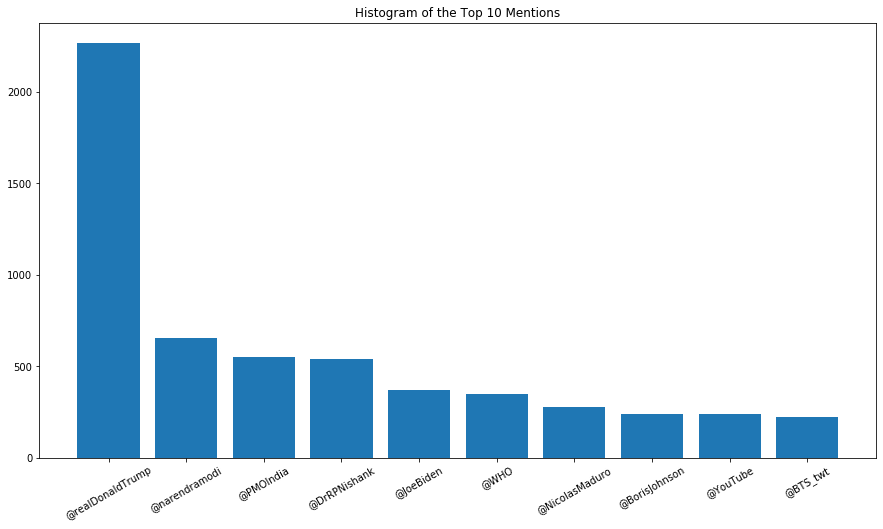

In [22]:
_ = top_k_entities(mentions,10,'Mentions')

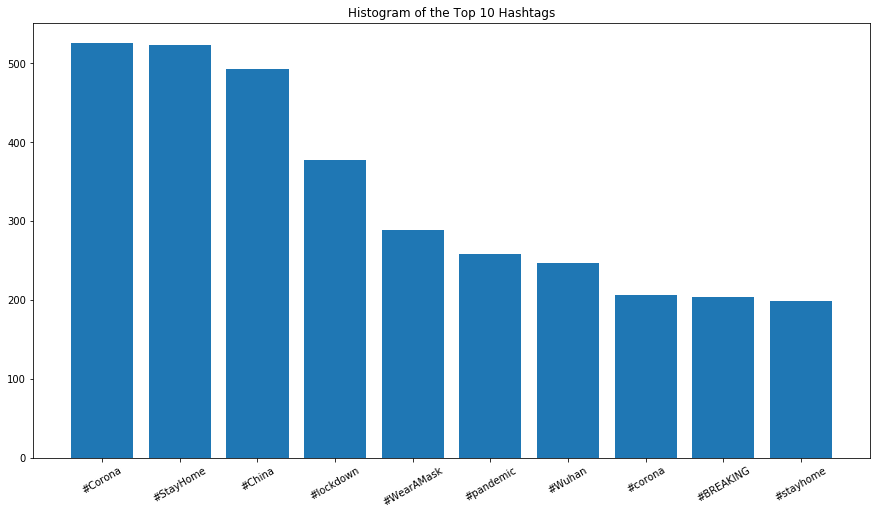

In [50]:
_ = top_k_entities(hashtags,10,'Hashtags')

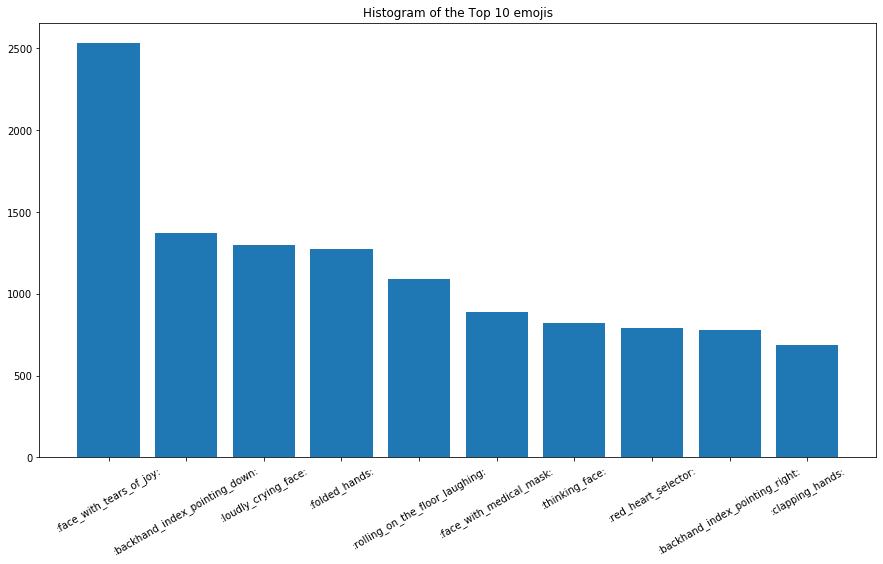

In [51]:
_ = top_k_entities(emojis,10,'emojis')

In [52]:
emoji.emojize(':face_with_tears_of_joy:')

'😂'

In [176]:
emoji.emojize(':water_wave:')

'🌊'

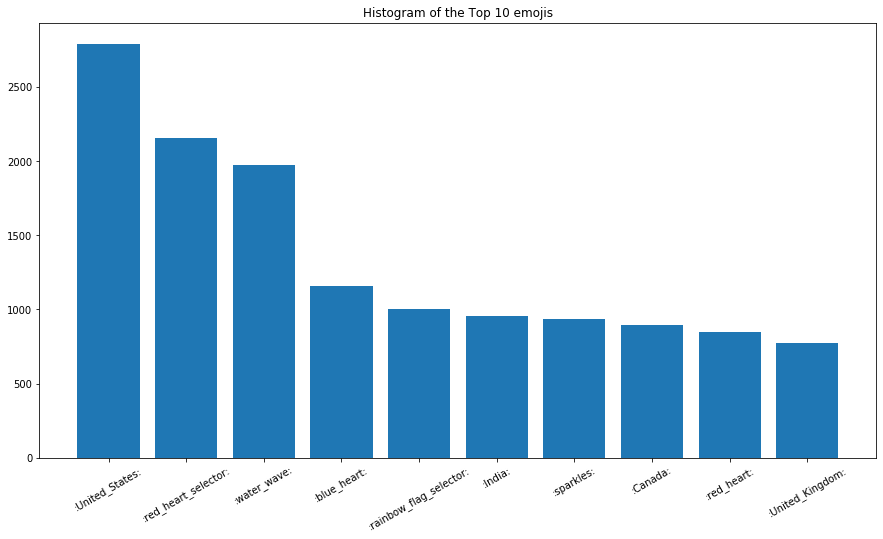

In [177]:
_ = top_k_entities(emojis_user,10,'emojis in user description')